In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [26]:
file_path = "spotify_songs.csv"
df = pd.read_csv(file_path)
print(df.head())

                 track_id                                         track_name  \
0  6f807x0ima9a1j3VPbc7VN  I Don't Care (with Justin Bieber) - Loud Luxur...   
1  0r7CVbZTWZgbTCYdfa2P31                    Memories - Dillon Francis Remix   
2  1z1Hg7Vb0AhHDiEmnDE79l                    All the Time - Don Diablo Remix   
3  75FpbthrwQmzHlBJLuGdC7                  Call You Mine - Keanu Silva Remix   
4  1e8PAfcKUYoKkxPhrHqw4x            Someone You Loved - Future Humans Remix   

       track_artist  track_popularity          track_album_id  \
0        Ed Sheeran                66  2oCs0DGTsRO98Gh5ZSl2Cx   
1          Maroon 5                67  63rPSO264uRjW1X5E6cWv6   
2      Zara Larsson                70  1HoSmj2eLcsrR0vE9gThr4   
3  The Chainsmokers                60  1nqYsOef1yKKuGOVchbsk6   
4     Lewis Capaldi                69  7m7vv9wlQ4i0LFuJiE2zsQ   

                                    track_album_name track_album_release_date  \
0  I Don't Care (with Justin Bieber) [Loud Luxu

In [27]:
print(df.shape)
df = df.dropna()
df = df.drop_duplicates(subset="track_id")
tempo_not_zero = df["tempo"] > 0
df = df[tempo_not_zero]
print(df.shape)

(32833, 23)
(28351, 23)


In [32]:
relevant_columns = [
    "track_popularity",
]

df = df[relevant_columns]
df["tempo_rounded"] = df["tempo"].round().astype(int)
df = df.drop("tempo", axis=1)

NameError: name 'valence' is not defined

In [29]:
df_rounded_temp = (
    df.groupby("tempo_rounded")["track_popularity"].mean().reset_index()
)

df_rounded_temp

,tempo_rounded,track_popularity
0,35,13.000000
1,37,60.000000
2,39,52.000000
3,46,1.000000
4,49,61.000000
...,...,...
164,212,54.333333
165,214,38.666667
166,215,28.000000
167,220,32.333333


/var/folders/8y/z54f8_6n19qfj1pkdc_jwtjw0000gq/T/ipykernel_10611/436209433.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(


<Axes: xlabel='tempo_rounded', ylabel='track_popularity'>

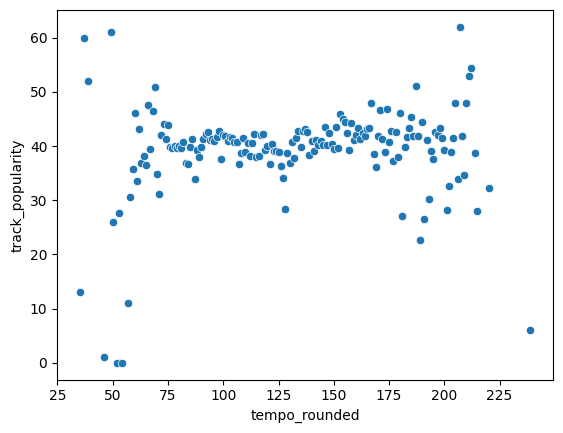

In [31]:
sns.scatterplot(
    x=df_rounded_temp["tempo_rounded"],
    y=df_rounded_temp["track_popularity"],
    palette="coolwarm",
)